AD(Arquitetura de dados/Dicionário de dados)

data: no formato dd/mm/aaaa

hora: no formato hh:mm:ss

Global_active_power: potência ativa média por minuto(em quilowatt)

Global_reactive_power: potência reativa média global da família por minuto(em quilowatt)

voltagem: tensão média por minuto(em volts)

intensidade global: intensidade de corrente média poe minuto global doméstica.

Sub_metering_1: Sub_medição de energia nº 1(em watt-hora de energia ativa) corresponde à cozinha que contém essencialmente uma máquina de lavar louça, forno e um micro-ondas e uma geladeira.

Sub_metering_2: Sub_medição de energia nº 2(em watt-hora de energia ativa) corresponde à lavanderia que contém essencialmente uma máquina de lavar, uma secadora e uma luz.

Sub_metering_2: Sub_medição de energia nº 3(em watt-hora de energia ativa) corresponde à um aquecedor elétrico e um ar condicionado.

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist
import warnings
warnings.filterwarnings("ignore")

In [160]:
df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep =';', parse_dates=['Date'], header=0)

In [161]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Análise Exploratória dos dados

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 142.5+ MB


In [163]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [164]:
#Verifacando valores misising values
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

# Pré-Processamento dos Dados

In [165]:
#Remove as duas primeiras colunas e remove os registros com valores faltantes
df = df.iloc[0:, 2:9].dropna()

In [166]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [167]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [168]:
#obtem os valores das variáveis de entrada em um formato de array
x= df.values
x

array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       [0.938, 0.0, 239.82, ..., 0.0, 0.0, 0.0],
       [0.934, 0.0, 239.7, ..., 0.0, 0.0, 0.0],
       [0.932, 0.0, 239.55, ..., 0.0, 0.0, 0.0]], dtype=object)

In [169]:
#coleta uam amostra de 1% dos dados para não comprometer a memória do computador
df ,amostra= train_test_split(x,train_size= .01)

In [170]:
df.shape

(20492, 7)

# Máquina Preditiva

Usando o **PCA**para reduzir a quantidade de variáveis

In [171]:
#Transformando as 7 variáveis em dois componentes principais
#aplica redução de dimensionalidades dos dados no array das variáveis
pca = PCA(n_components= 2, whiten=True).fit_transform(x)

In [172]:
pca

array([[ 1.64815523, -0.18153949],
       [ 1.78238377,  0.09845917],
       [ 1.89837698,  0.10324571],
       ...,
       [-0.66967052,  0.19233303],
       [-0.66796753,  0.19396135],
       [-0.66580795,  0.19602461]])

Selecionando o número de clusters através do método Elbow(Soma das distâncias quadráticas entre clusters)

In [173]:
#inertia - soma das distâncias quadráticas
inertia=[]
for n in range(1, 12):
    algorithum = (KMeans(n_clusters=n))
    algorithum.fit(pca)
    inertia.append(algorithum.inertia_)

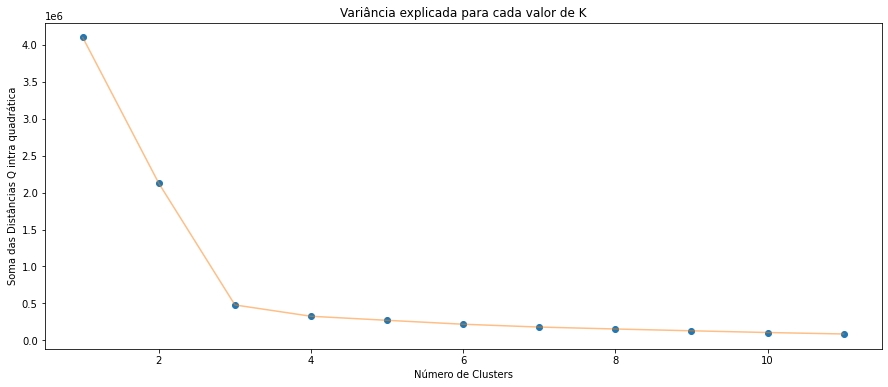

In [174]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 12), inertia, 'o')
plt.plot(np.arange(1, 12), inertia, '-', alpha= 0.5)
plt.xlabel('Número de Clusters'), plt.ylabel('Soma das Distâncias Q intra quadrática')
plt.title('Variância explicada para cada valor de K')
plt.show()

In [175]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(pca)
print(cluster_labels)



[3 3 3 ... 0 0 0]


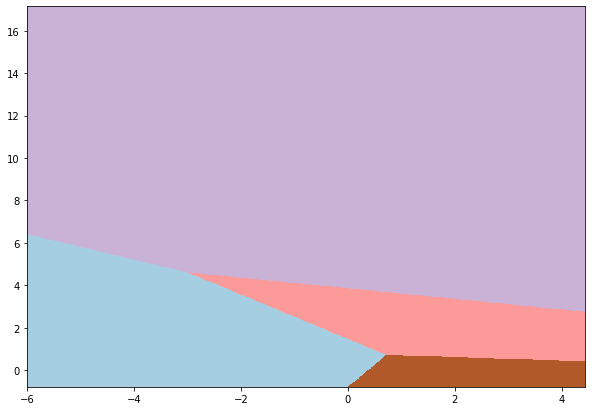

In [176]:
#obtem os valores mínimos e maximos e organiza o shape
h = .02
x_min, x_max = pca[:, 0].min() -5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() +1, pca[:, 1].max() + 5
#cria uma grade densa de pontos para amostrar
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#Convertendo para arrays numpy
npx = xx.ravel()
npy = yy.ravel()
#convertendo para lista de 2D
pt_amostra = np.c_[npx,npy]
#gerando rótulos de previsão para cada ponto
Z = clusterer.predict(pt_amostra)

plt.figure(1, figsize=(10,7))
plt.clf()
Z= Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(),yy.max()), 
           cmap= plt.cm.Paired, 
           aspect= 'auto', 
           origin = 'lower') 
plt.show()

In [ ]:
labels = clusterer.labels_
silhouette_score(pca,labels, metric='euclidean')

In [ ]:
#lista com nomes das colunas
names = ['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity','Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [ ]:
#incluindo o número do cluster na base de clientes
cluster_map = pd.DataFrame(df, columns= names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'],errors='coerce')
cluster_map['cluster'] = clusterer.labels_

In [ ]:
cluster_map

In [ ]:
#calcula a média de energia por cluster
cluster_map.groupby('cluster')['Global_active_power'].mean()